In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Display all columns of dataframes
pd.set_option('display.max_columns', None)

#Set color palette for visualizations
sns.set_palette(sns.color_palette('Dark2'))

# <a name="top"></a> US Census Data:
## A Study of Which Features Impact Income Greater or Lesser than $50,000


### Data Cleaning and Engineering


### Project Contents:
|Name|Description|
|---|---|
|1_cleaning_eda|Cleans and prepares data for modeling. Exploratory Data Analysis.|
|2_modeling|Binary classification model predicting income greater or lesser than $50k.|


You are currently in notebook 1_cleaning_eda. 



#### Notebook Table of Contents

* [Reading in the raw data and initial EDA](#read)
* [Cleaning the US Census Data for Modeling](#clean_census)
* [Continued Exploratory Data Analysis (post-data cleaning and feature engineering)](#eda)


#### Notebook summary: 
The US Census Data provides abundant features to consider. While initial EDA reveals no nulls in the data, closer examination proves the data to be a bit more complicated to prepare for modeling. 

##### Not in Universe:
* Several questions indicate that a feature is 'Not in universe' -- a designation which indicates that this question was not asked of the interviewee. Generally, this appears to be related to questions that would not have been applicable to the interviewee. For example, it would be logical to assume that a person who states that they are currently employed would not be asked about reason for unemployment. However, we also find this designation is categories we would expect to be filled for all interviewees, such as state of residence. 


### <a name="read"></a>Reading in the raw data and initial EDA
[Jump to the top of this notebook](#top)

In [2]:
# setting column headers

headers = ['age', 'worker_class', 'industry_detailed','occupation_detailed', 'education', 'wage_per_hour', 'education_current_enrollment','marital_status', 
           'industry_major', 'occupation_major', 'race', 'hispanic_origin', 'sex', 'labor_union','unemployment_reason', 'employment_status', 
           'cap_gains', 'cap_loss', 'stock_dividends', 'tax_filer_stat', 'residence_region', 'residence_state', 'household_detailed', 'household_summary', 'instance_weight',
           'mig_code_change_in_msa', 'mig_code_change_in_reg', 'move_in_region', 'same_res_one_year_ago', 'pre_res_sunbelt','num_employed', 'fam_members_under_18','country_birth_father','country_birth_mother',
           'country_birth_self', 'citizenship', 'self_employed', 'vets_admin_quest', 'veterans_benefits', 'weeks_worked', 'year', 'target']

In [3]:
# reading in the raw US census data, divided into training and testing datasets. 

train_df = pd.read_csv('../data/raw_data/census_income_learn.csv', names=headers, index_col=False)
test_df = pd.read_csv('../data/raw_data/census_income_test.csv', names=headers, index_col=False)

#### Consideration for future study .

I wanted to pull in world development indicators for country of origin. After further reflection, I'm not sure how useful this information can be without also knowing what a year a person or their parents arrived in the US. I do still think that it is an important item for future examination. This could be an interesting time series investigation, given the right data. 

In [4]:
dev_df = pd.read_excel('../data/raw_data/world_bank_income_rankings_2021.xlsx', sheet_name='List of economies', usecols=['Economy', 'Income group'])
dev_df.head(3)

,Economy,Income group
0,Aruba,High income
1,Afghanistan,Low income
2,Angola,Lower middle income


In [5]:
train_df.shape

(199523, 42)

In [6]:
train_df.head(3)

,age,worker_class,industry_detailed,occupation_detailed,education,wage_per_hour,education_current_enrollment,marital_status,industry_major,occupation_major,race,hispanic_origin,sex,labor_union,unemployment_reason,employment_status,cap_gains,cap_loss,stock_dividends,tax_filer_stat,residence_region,residence_state,household_detailed,household_summary,instance_weight,mig_code_change_in_msa,mig_code_change_in_reg,move_in_region,same_res_one_year_ago,pre_res_sunbelt,num_employed,fam_members_under_18,country_birth_father,country_birth_mother,country_birth_self,citizenship,self_employed,vets_admin_quest,veterans_benefits,weeks_worked,year,target
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.


In [7]:
# There are no nulls in the data, and the data types all appear to be correct at first glance. 

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   age                           199523 non-null  int64  
 1   worker_class                  199523 non-null  object 
 2   industry_detailed             199523 non-null  int64  
 3   occupation_detailed           199523 non-null  int64  
 4   education                     199523 non-null  object 
 5   wage_per_hour                 199523 non-null  int64  
 6   education_current_enrollment  199523 non-null  object 
 7   marital_status                199523 non-null  object 
 8   industry_major                199523 non-null  object 
 9   occupation_major              199523 non-null  object 
 10  race                          199523 non-null  object 
 11  hispanic_origin               199523 non-null  object 
 12  sex                           199523 non-nul

In [8]:
train_df.describe()

,age,industry_detailed,occupation_detailed,wage_per_hour,cap_gains,cap_loss,stock_dividends,instance_weight,num_employed,self_employed,veterans_benefits,weeks_worked,year
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1740.380269,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,993.768156,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000


In [9]:
train_df.columns

Index(['age', 'worker_class', 'industry_detailed', 'occupation_detailed',
       'education', 'wage_per_hour', 'education_current_enrollment',
       'marital_status', 'industry_major', 'occupation_major', 'race',
       'hispanic_origin', 'sex', 'labor_union', 'unemployment_reason',
       'employment_status', 'cap_gains', 'cap_loss', 'stock_dividends',
       'tax_filer_stat', 'residence_region', 'residence_state',
       'household_detailed', 'household_summary', 'instance_weight',
       'mig_code_change_in_msa', 'mig_code_change_in_reg', 'move_in_region',
       'same_res_one_year_ago', 'pre_res_sunbelt', 'num_employed',
       'fam_members_under_18', 'country_birth_father', 'country_birth_mother',
       'country_birth_self', 'citizenship', 'self_employed',
       'vets_admin_quest', 'veterans_benefits', 'weeks_worked', 'year',
       'target'],
      dtype='object')

In [10]:
column_list = list(train_df.columns)

#uncomment the code below to see value counts for each column. I used this when considering how I wanted to handle categorical variables, but please note that this will print a very long output.

# for col in column_list:
#     print(col + '\n', train_df[col].value_counts(normalize=True), '\n')

### Missing Data

Unfortunately, many variables are overwhelmed by a 'Not in universe' categorization. For variables missing over 50%, I opted to remove them from the data for modeling purposes in order to avoid overwhelming the model. I considered imputing values, but given the significant amount of missing data, it did not seem a viable option. 

Variables removed due to over 50% missing data include:

* worker_class
* wages_per_hour
* education_current_enrollment
* labor_union
* unemployment_reason
* residence_region
* residence_state
* mig_code_change_in_msa
* mig_code_change_in_region
* move_in_regin
* same_res_one_year_ago
* pre_res_sunbelt
* vets_admin_quest

### Data columns unused for other reasons

* fam_members_under_18 : family members under 18 are unlikely to earn $50k annually independantly. I feel that this category is fully encompassed by the age group, and therefore this detail regarding whether or not one or both parents are present in the home is redundant. 

* cap_gains and cap_loss were sparsely represented in the data, and I opted to remove them from consideration because the vast majority of fields were set to 0. 

### Bins of data

I opted to place age and education into groups. For example, since most individuals under the age of 18 are not employed full-time, this age group is unlikely to earn over $50k annually by their own means. 

Variables to be grouped into bins:

* age
* stock_dividends

If I rerun this model at a future date, I will also bin: 
* weeks_worked
* education

#### Age

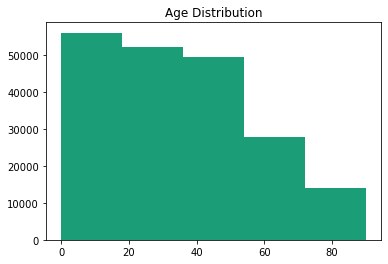

In [11]:
plt.hist(train_df['age'], bins=5)
plt.title('Age Distribution');

In [12]:
train_df.groupby(by='target')[['age']].describe()

age                                                    
              count       mean        std   min   25%   50%   75%   max
target                                                                 
 - 50000.  187141.0  33.715316  22.620236   0.0  14.0  31.0  49.0  90.0
 50000+.    12382.0  46.266193  11.830906  16.0  38.0  45.0  53.0  90.0

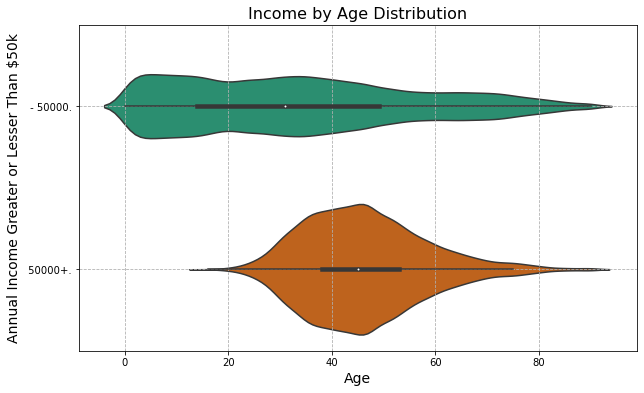

In [13]:
plt.figure(figsize=(10,6))
sns.violinplot(x=train_df['age'], y=train_df['target'])
plt.title('Income by Age Distribution', fontsize=16)
plt.ylabel('Annual Income Greater or Lesser Than $50k', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.grid(linestyle='--');

 Here we can see that that income over 50,000, represented by the brown violin at the bottom, is most heavily represented by individuals aged around 35-45 years of age, while income below $50k is heavily represented by those under the age of 35, as represented by the green violin at the top. 

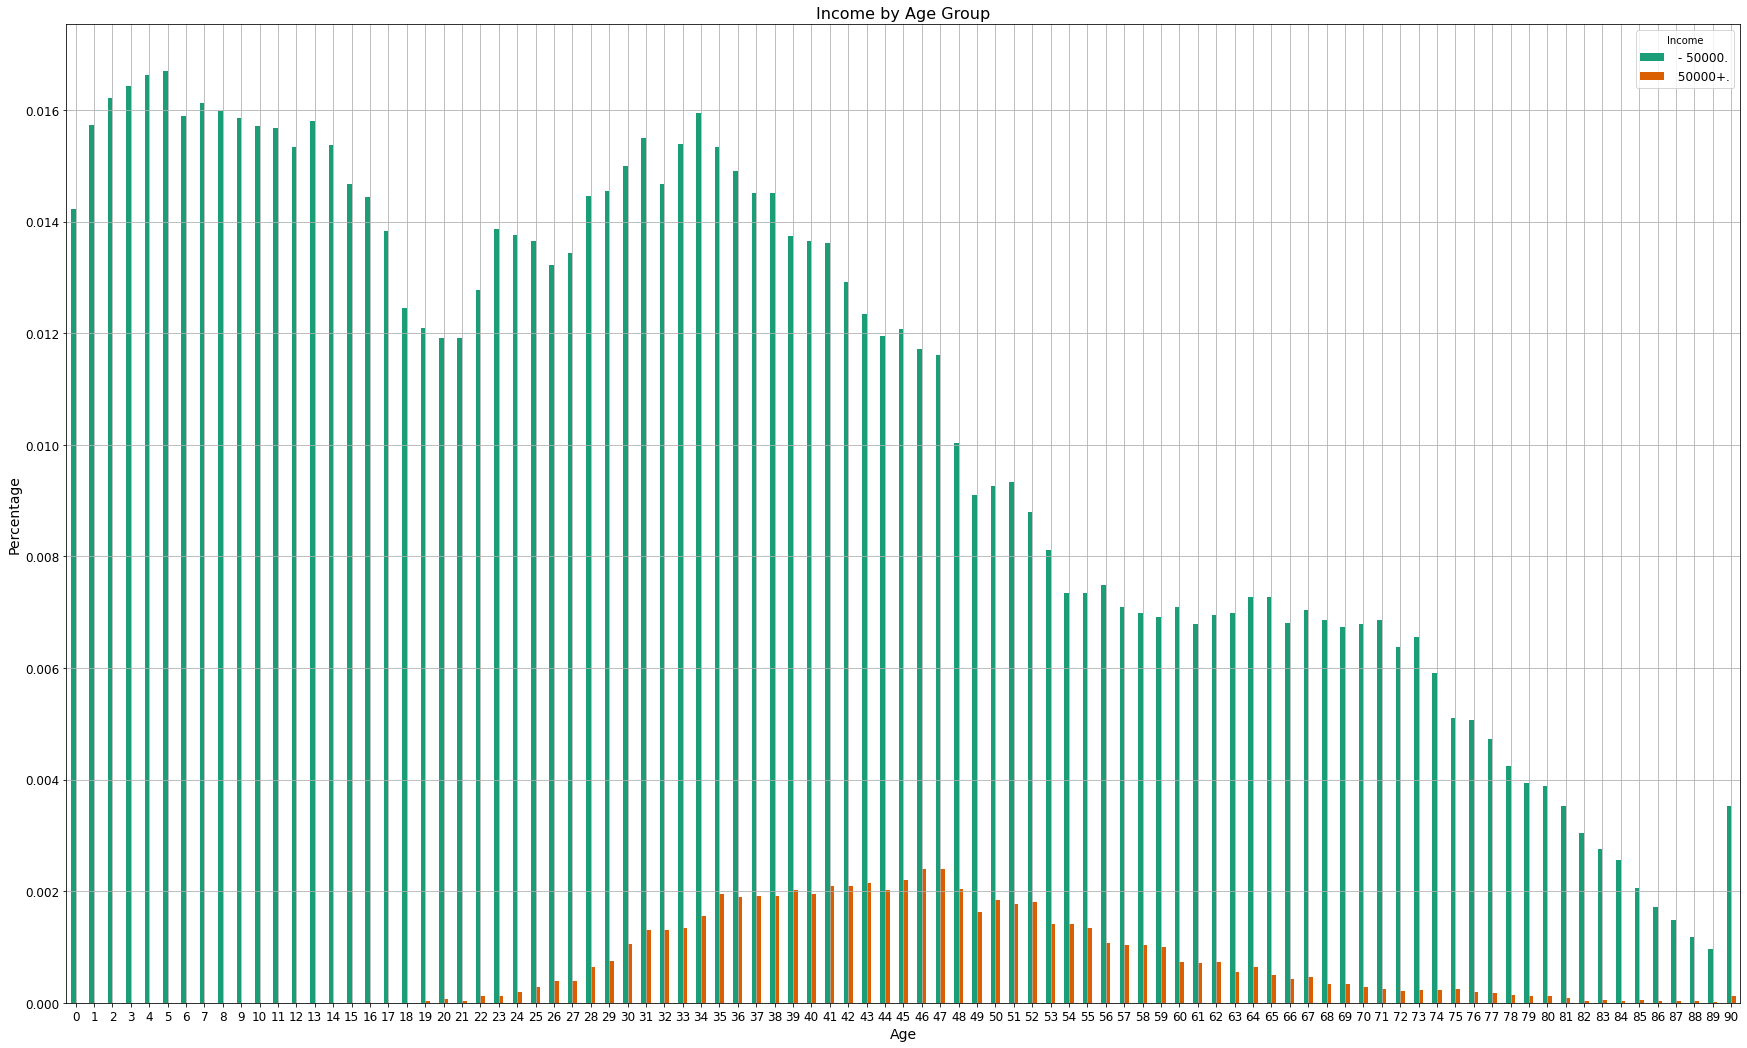

In [14]:
age_crosstable=pd.crosstab(train_df['age'],train_df['target'], normalize=True)

ax = age_crosstable.plot(kind='bar', stacked=False, rot=0, figsize=(30 , 18))
ax.legend(title='Income', fontsize=12, )
plt.xlabel('Age', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Income by Age Group', fontsize=16)
plt.grid();

While this plot is a bit difficult to read, what we can clearly see is further representation of this bell curve with a peak in the late 40s, represented by the brown bars. Based on this, I engineered age into a few bins to use in the model, rather than keeping this as a continuous variable. 


#### Citizenship

In [15]:
train_df['citizenship'].value_counts(normalize=True)

 Native- Born in the United States              0.887076
 Foreign born- Not a citizen of U S             0.067165
 Foreign born- U S citizen by naturalization    0.029345
 Native- Born abroad of American Parent(s)      0.008801
 Native- Born in Puerto Rico or U S Outlying    0.007613
Name: citizenship, dtype: float64

In [16]:
income_citizenship = train_df.groupby(by = 'target')['citizenship'].value_counts(normalize=True)

In [17]:
income_citizenship

target     citizenship                                 
 - 50000.   Native- Born in the United States              0.886193
            Foreign born- Not a citizen of U S             0.068980
            Foreign born- U S citizen by naturalization    0.028187
            Native- Born abroad of American Parent(s)      0.008699
            Native- Born in Puerto Rico or U S Outlying    0.007941
 50000+.    Native- Born in the United States              0.900420
            Foreign born- U S citizen by naturalization    0.046842
            Foreign born- Not a citizen of U S             0.039735
            Native- Born abroad of American Parent(s)      0.010338
            Native- Born in Puerto Rico or U S Outlying    0.002665
Name: citizenship, dtype: float64

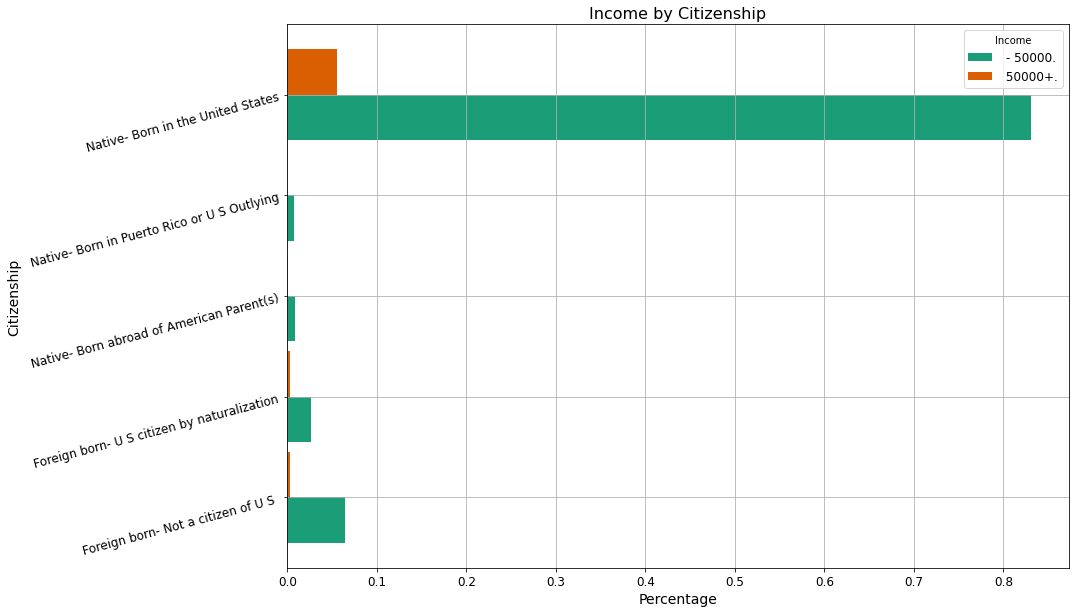

In [18]:
citizenship_crosstable=pd.crosstab(train_df['citizenship'],train_df['target'], normalize=True)

ax = citizenship_crosstable.plot(kind='barh', stacked=False, rot=0, figsize=(14, 10), width=.9)
ax.legend(title='Income', fontsize=12, )
plt.xlabel('Percentage', fontsize=14)
plt.ylabel('Citizenship', fontsize=14)
plt.yticks(fontsize=12, rotation=15)
plt.xticks(fontsize=12)
plt.title('Income by Citizenship', fontsize=16)

plt.grid();

 Citizenship status indicated if a person was a native citizen, naturalized, or was not a citizen. While it can be a bit tricky at first glance to gleen much insight regarding citizenship, by taking a closer look at the numbers we can make some interesting observations. 
 
 While US citizens by naturalization make up only 2.9% of the population of this dataset, 10% of that population earns over $50k, the highest percentage among all of the groups., native US citizens born in Puerto Rico or US Outlying islands are least likely to make over 50k (just 2% of the population).

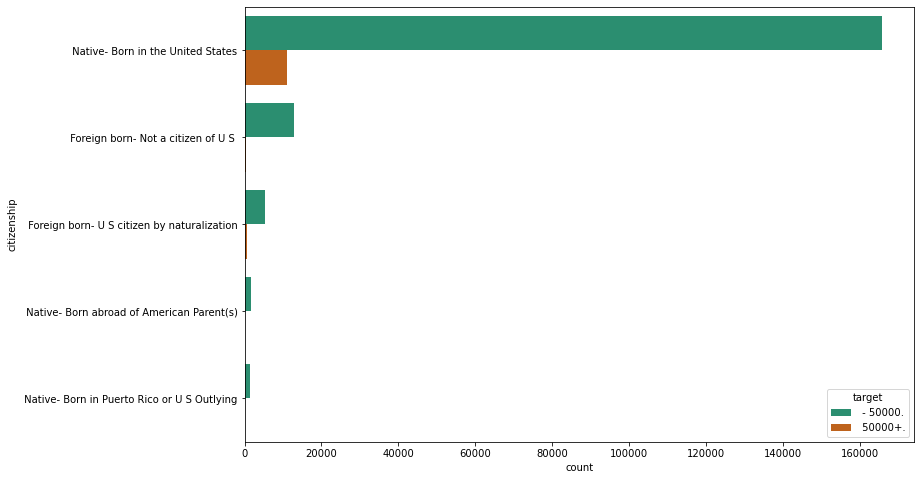

In [19]:
plt.figure(figsize=(12,8))
sns.countplot(y = train_df['citizenship'], hue = train_df['target']);

In [20]:
train_df['citizenship'].value_counts()

 Native- Born in the United States              176992
 Foreign born- Not a citizen of U S              13401
 Foreign born- U S citizen by naturalization      5855
 Native- Born abroad of American Parent(s)        1756
 Native- Born in Puerto Rico or U S Outlying      1519
Name: citizenship, dtype: int64

In [21]:
train_df[train_df['citizenship'] == ' Native- Born in Puerto Rico or U S Outlying']['target'].value_counts(normalize=True)

 - 50000.    0.978275
 50000+.     0.021725
Name: target, dtype: float64

In [22]:
train_df[train_df['citizenship'] == ' Foreign born- Not a citizen of U S ']['target'].value_counts(normalize=True)

 - 50000.    0.963286
 50000+.     0.036714
Name: target, dtype: float64

In [23]:
train_df[train_df['citizenship'] == ' Foreign born- U S citizen by naturalization']['target'].value_counts(normalize=True)

 - 50000.    0.900939
 50000+.     0.099061
Name: target, dtype: float64

In [24]:
train_df[train_df['citizenship'] == ' Native- Born abroad of American Parent(s)']['target'].value_counts(normalize=True)

 - 50000.    0.927107
 50000+.     0.072893
Name: target, dtype: float64

In [25]:
train_df[train_df['citizenship'] == ' Native- Born in the United States']['target'].value_counts(normalize=True)

 - 50000.    0.937008
 50000+.     0.062992
Name: target, dtype: float64

In [26]:
train_df['citizenship'].value_counts(normalize=True)

 Native- Born in the United States              0.887076
 Foreign born- Not a citizen of U S             0.067165
 Foreign born- U S citizen by naturalization    0.029345
 Native- Born abroad of American Parent(s)      0.008801
 Native- Born in Puerto Rico or U S Outlying    0.007613
Name: citizenship, dtype: float64

''

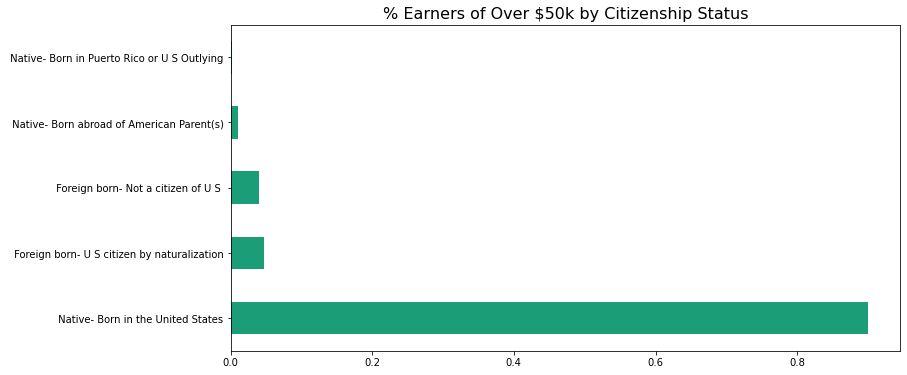

In [27]:
train_df[train_df['target'] == ' 50000+.']['citizenship'].value_counts(normalize=True).plot(kind='barh', figsize=(12,6))
plt.title('% Earners of Over $50k by Citizenship Status', fontsize=16)
;

Based on the citizenship breakdowns seen above, we can note that naturalized US citizens have the highest population earning over 50k , falling at 9.9% of the population, whereas native US citizens born in Puerto Rico or US Outlying islands are least likely to make over 50k (just 3.7% of the population).

#### Sex

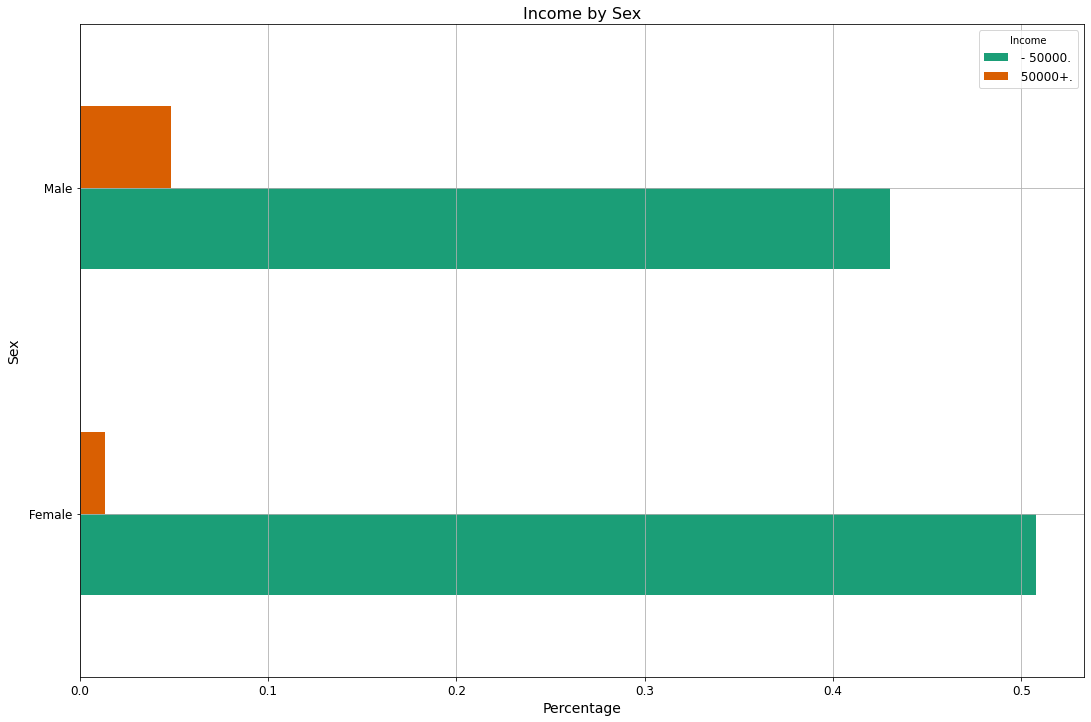

In [28]:
gender_crosstable=pd.crosstab(train_df['sex'],train_df['target'], normalize=True)

ax = gender_crosstable.plot(kind='barh', stacked=False, rot=0, figsize=(18, 12))
ax.legend(title='Income', fontsize=12, )
plt.xlabel('Percentage', fontsize=14)
plt.ylabel('Sex', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Income by Sex', fontsize=16)
plt.grid();

In [29]:
gender_crosstable

target,- 50000.,50000+.
sex,,
Female,0.507816,0.013347
Male,0.430126,0.048711


Over the years, data has consistently shown men earning more than women, and this census data shows the same. As you can see here, women make up a larger part of the overall population of the data, but less of the population earning over $50,000. 

#### Marital Status

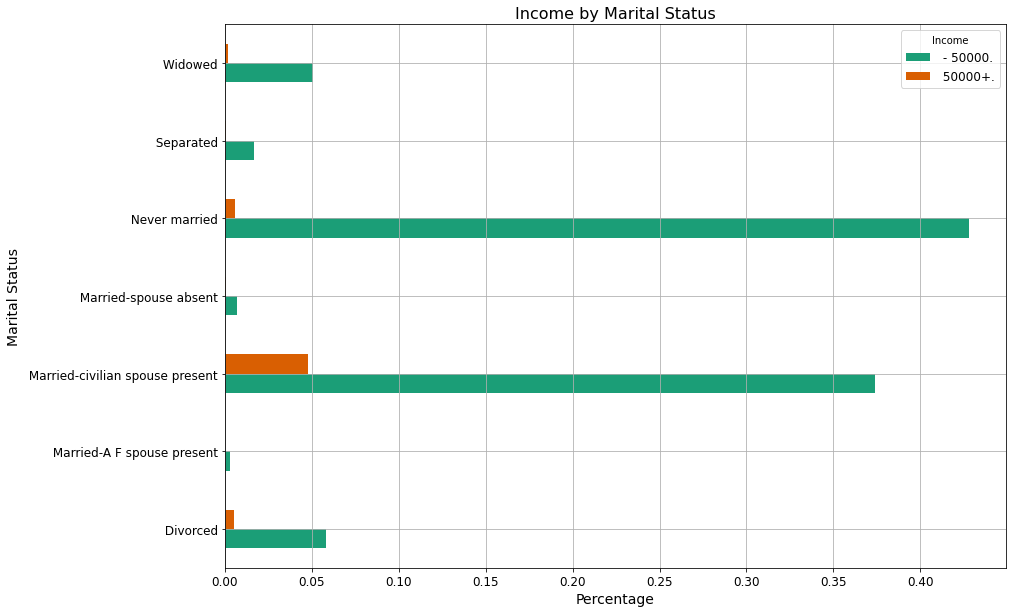

In [30]:
marital_crosstable=pd.crosstab(train_df['marital_status'],train_df['target'], normalize=True)

ax = marital_crosstable.plot(kind='barh', stacked=False, rot=0, figsize=(14, 10))
ax.legend(title='Income', fontsize=12, )
plt.xlabel('Percentage', fontsize=14)
plt.ylabel('Marital Status', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Income by Marital Status', fontsize=16)
plt.grid();

As we can see here, while both married with spouse present and never married populations overwhelm all others, married individuals are much more heavily represented in the population earning over 50k. According to Forbes, this is actually a trend that is on the rise over the past 30 years. Single men earned a median of 21,400 less than their partnered counterparts, and single women made a median of $8,000 less than theirs. Of course, we already know from the previous slide that women are making less money overall. 

source: https://www.forbes.com/sites/marisadellatto/2021/10/05/single-adults-make-less-money-than-partnered-ones-study-says/?sh=360d12ad454f

#### Race

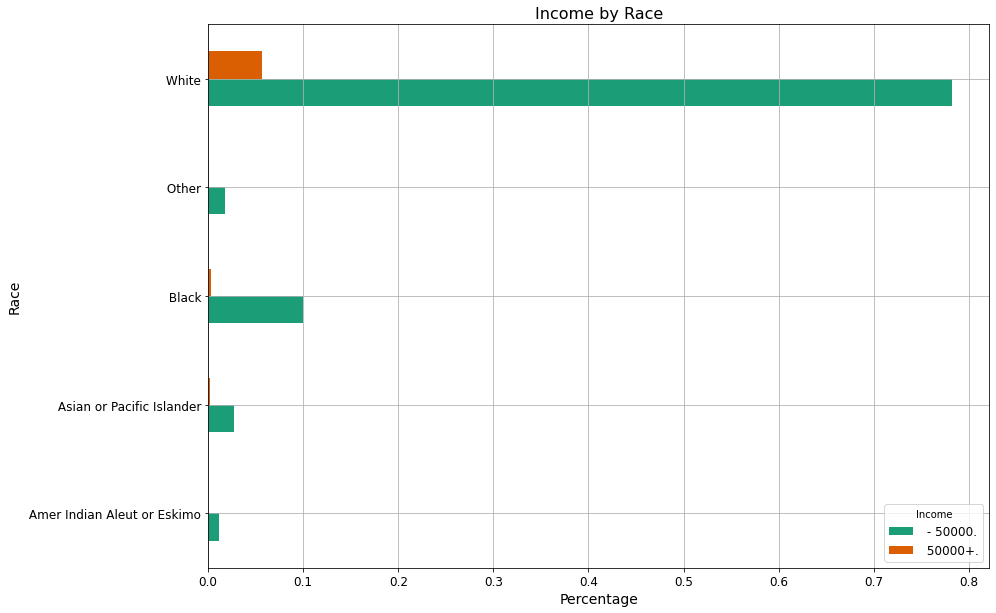

In [31]:
race_crosstable=pd.crosstab(train_df['race'],train_df['target'], normalize=True)

ax = race_crosstable.plot(kind='barh', stacked=False, rot=0, figsize=(14, 10))
ax.legend(title='Income', fontsize=12, )
plt.xlabel('Percentage', fontsize=14)
plt.ylabel('Race', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Income by Race', fontsize=16)
plt.grid();

''

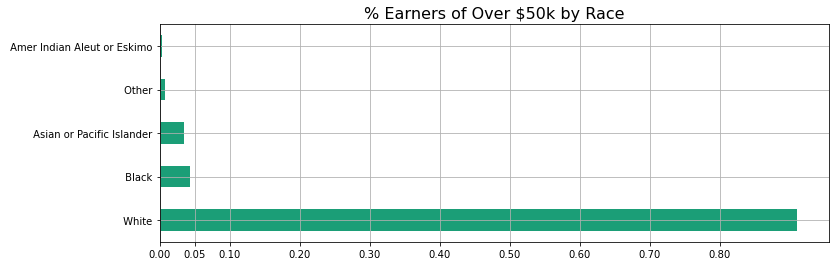

In [32]:

train_df[train_df['target'] == ' 50000+.']['race'].value_counts(normalize=True).plot(kind='barh', figsize=(12,4))
plt.title('% Earners of Over $50k by Race', fontsize=16)
plt.grid()
plt.xticks([.0, .05, .1, .2, .3, .4, .5, .6, .7, .8])
;

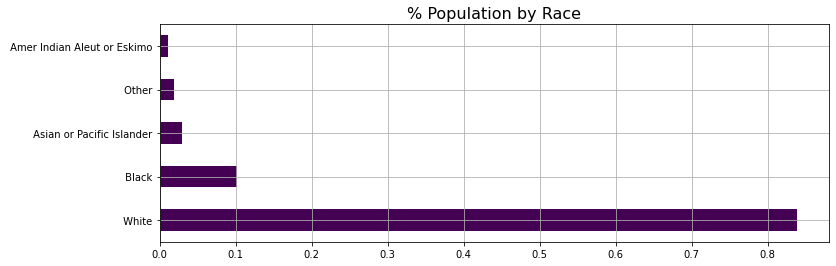

In [33]:
train_df['race'].value_counts(normalize=True).plot(kind='barh', figsize=(12,4), cmap='viridis')
plt.title('% Population by Race', fontsize=16)
plt.grid();

Finally, taking a look at breakdown by race we see an unequal division. While the overall black population comes to 10% of the data, it represents less than 5% of earners over $50k. 

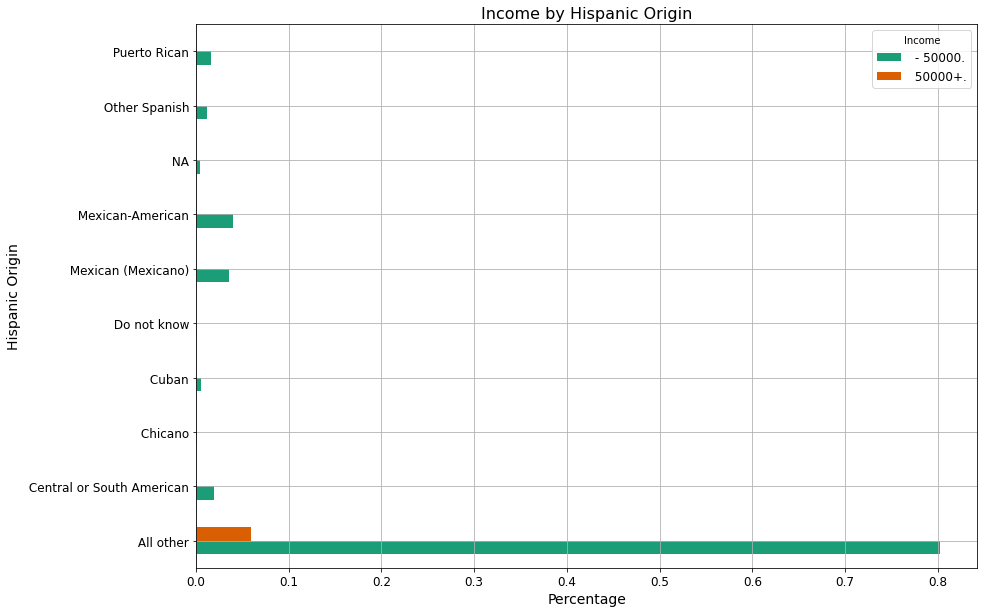

In [34]:
hispanic_crosstable=pd.crosstab(train_df['hispanic_origin'],train_df['target'], normalize=True)

ax = hispanic_crosstable.plot(kind='barh', stacked=False, rot=0, figsize=(14, 10))
ax.legend(title='Income', fontsize=12, )
plt.xlabel('Percentage', fontsize=14)
plt.ylabel('Hispanic Origin', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Income by Hispanic Origin', fontsize=16)
plt.grid();

#### Education

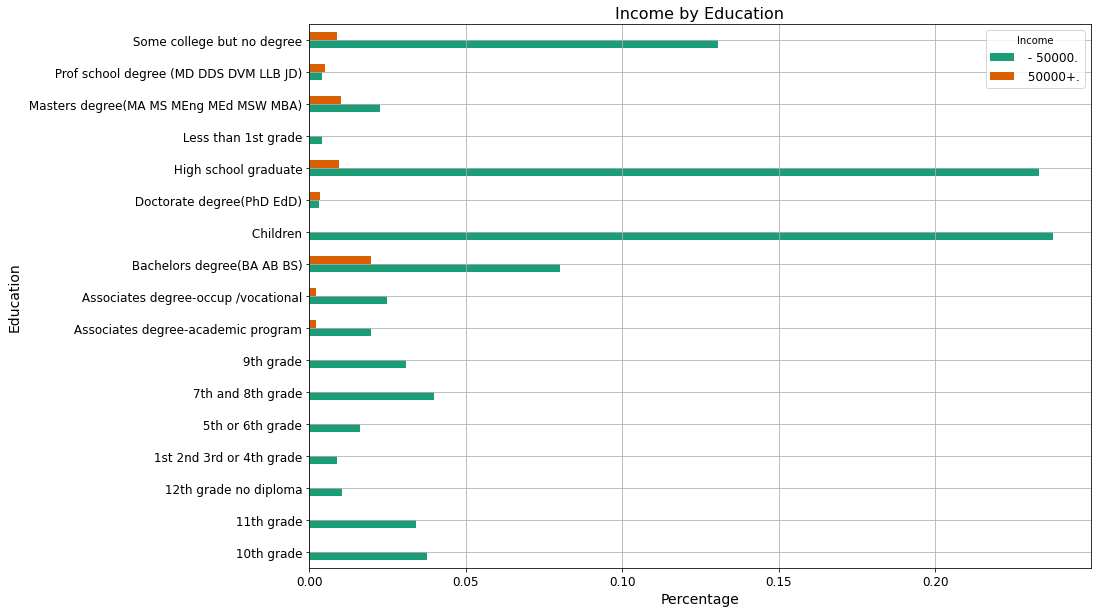

In [35]:
education_crosstable=pd.crosstab(train_df['education'],train_df['target'], normalize=True)

ax = education_crosstable.plot(kind='barh', stacked=False, rot=0, figsize=(14, 10))
ax.legend(title='Income', fontsize=12, )
plt.xlabel('Percentage', fontsize=14)
plt.ylabel('Education', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Income by Education', fontsize=16)
plt.grid();

Holders of professional level degrees and doctorates are populations MORE likely to earn over 50k than less, the first time we've come across this in the population. 

#### Tax Filer Status

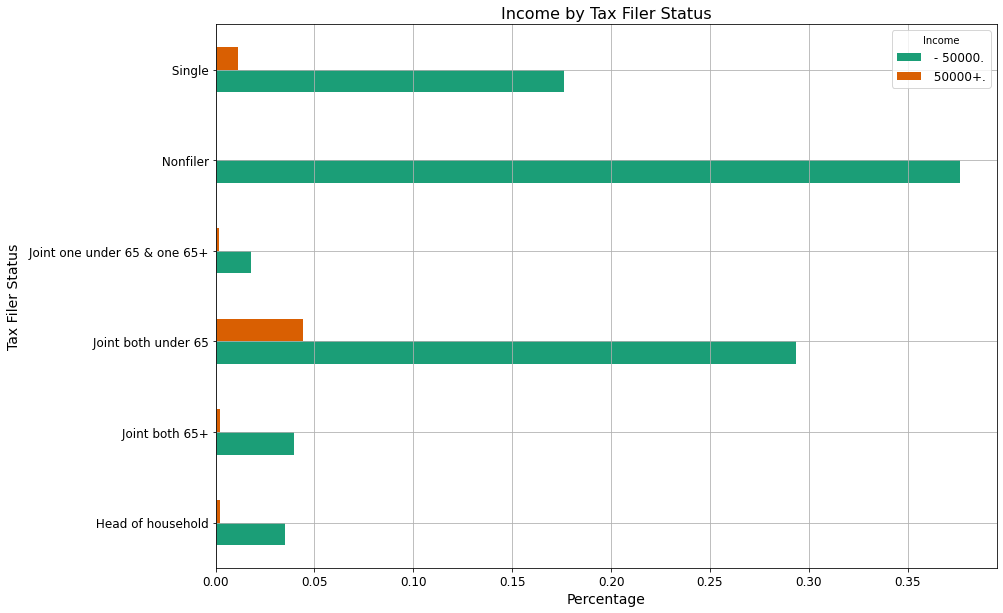

In [36]:
tax_crosstable=pd.crosstab(train_df['tax_filer_stat'],train_df['target'], normalize=True)

ax = tax_crosstable.plot(kind='barh', stacked=False, rot=0, figsize=(14, 10))
ax.legend(title='Income', fontsize=12, )
plt.xlabel('Percentage', fontsize=14)
plt.ylabel('Tax Filer Status', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Income by Tax Filer Status', fontsize=16)
plt.grid();

#### Stock Dividends, Capital Gains, Capital Losses

In [37]:
train_df['stock_dividends'].describe()

count    199523.000000
mean        197.529533
std        1984.163658
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       99999.000000
Name: stock_dividends, dtype: float64

In [38]:
train_df['stock_dividends'].value_counts(ascending=True)

5024          1
5663          1
21100         1
1309          1
568           1
          ...  
200         866
1000        894
500        1030
100        1148
0        178382
Name: stock_dividends, Length: 1478, dtype: int64

In [39]:
train_df[train_df['stock_dividends'] > 0]['stock_dividends'].describe()

count    21141.000000
mean      1864.229932
std       5835.216597
min          1.000000
25%         82.000000
50%        301.000000
75%       1362.000000
max      99999.000000
Name: stock_dividends, dtype: float64

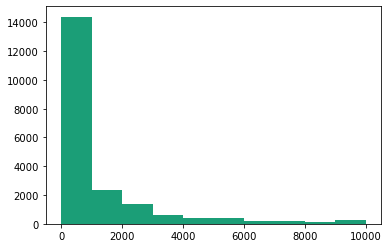

In [40]:
plt.hist(train_df[train_df['stock_dividends'] > 0]['stock_dividends'], bins=10, range=(0, 10000));

/Users/TJohn/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


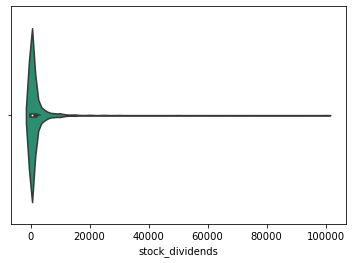

In [41]:
sns.violinplot(train_df[train_df['stock_dividends'] > 0]['stock_dividends']);

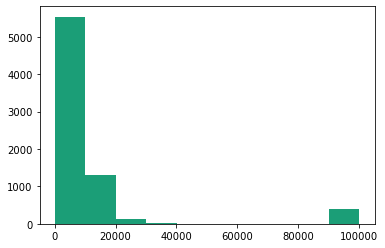

In [42]:
plt.hist(train_df[train_df['cap_gains'] > 0]['cap_gains']);

/Users/TJohn/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


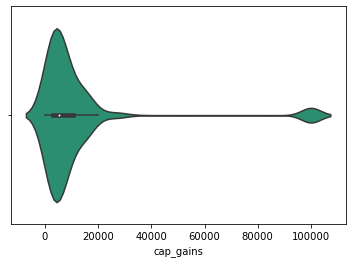

In [43]:
sns.violinplot(train_df[train_df['cap_gains'] > 0]['cap_gains']);

In [44]:
train_df[train_df['cap_gains'] > 0]['cap_gains'].describe()

count     7379.000000
mean     11754.497493
std      21533.053259
min        114.000000
25%       2964.000000
50%       5178.000000
75%      10520.000000
max      99999.000000
Name: cap_gains, dtype: float64

In [45]:
train_df[train_df['cap_loss'] > 0]['cap_loss'].describe()

count    3906.000000
mean     1906.031490
std       463.154428
min       155.000000
25%      1669.000000
50%      1887.000000
75%      2001.000000
max      4608.000000
Name: cap_loss, dtype: float64

### <a name="clean_census"></a>Cleaning the US Census Data for Modeling
[Jump to the top of this notebook](#top)

In [46]:
# A function to prepare training and testing dataframes for modeling. 

def prep_for_model(df):
    
    '''
    a function to prepare dataframes for binary classification modeling. 
    converts categorical features to numerical values.
    '''
    
   
    def parent_birth_country(row):  
        '''
        preparing to engineer new feature designating if a person has 0, 1, or 2 parents born in the US.
        '''
        if row['country_birth_father'] == 0 and row['country_birth_mother'] == 0:
            return 0
        elif row['country_birth_father'] == 1 and row['country_birth_mother'] == 1:
            return 2
        else:
            return 1
    
    #I opted to get_dummies for citiznship instead of mapping categories into bins. Uncomment the code below to use this option. 
#     def citizenship(row):  
#         '''
#         preparing to engineer new feature designating if a person was born a US citizen, became a citizen, or is not a citizen.
#         '''
        
#         born_amcit = [' Native- Born in the United States', ' Native- Born abroad of American Parent(s)', ' Native- Born in Puerto Rico or U S Outlying']
#         became_amcit = [' Foreign born- U S citizen by naturalization']
#         not_amcit = [' Foreign born- Not a citizen of U S', ]
#         if row['citizenship'] in born_amcit:
#             return 2
#         elif row['citizenship']in became_amcit:
#             return 1
#         else:
#             return 0
    # #mapping citizenship function
    # df['citizenship'] = df.apply(lambda row: citizenship(row), axis=1)
    
    #binarize sex (0=male, 1=female)
    df['sex'] = [1 if sex.strip() == 'Female' else 0 for sex in df['sex']]
    
    #binarize birth country father, mother, self
    df['country_birth_father'] = [1 if country.strip() == 'United-States' else 0 for country in df['country_birth_father']]
    df['country_birth_mother'] = [1 if country.strip() == 'United-States' else 0 for country in df['country_birth_mother']]
    df['country_birth_self'] = [1 if country.strip() == 'United-States' else 0 for country in df['country_birth_self']]
    
    #encode categoricals
    features_to_encode = ['education', 'marital_status', 'hispanic_origin', 'employment_status', 'tax_filer_stat', 'household_summary',
                     'industry_major', 'occupation_major']
    for cat in features_to_encode:
        le = LabelEncoder()
        le.fit(df[cat])
        le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        print('labelencode map: ', cat)
        print(le_name_mapping)
        print('\n')
        df[cat] = le.transform(df[cat])
        
    
    #get dummies: race and citizenship
    df = pd.get_dummies(train_df, columns=['race', 'citizenship'])
     
    #mapping parent_birth_country_function
    df['parent_birth_country'] = df.apply(lambda row: parent_birth_country(row), axis=1)
    
    #age brackets
    age_map_list = []

    for num in df['age']:

        if num < 18:
            age_map_list.append(0)
        elif num >= 18 and num <= 34:
            age_map_list.append(1)
        elif num > 34 and num <= 53:
            age_map_list.append(2)
        elif num > 53 and num <=75:
            age_map_list.append(1)
        else:
            age_map_list.append(0)

    df['age'] = age_map_list
    
    #stock_dividend brackets
    sd_map_list = []

    for num in df['stock_dividends']:

        if num < 1:
            sd_map_list.append(0)
        elif num >= 1 and num <= 82:
            sd_map_list.append(1)
        elif num > 82 and num <= 301:
            sd_map_list.append(2)
        elif num > 301 and num <=1362:
            sd_map_list.append(3)
        else:
            sd_map_list.append(4)

    df['stock_dividends'] = sd_map_list
    
    #binarize target: 0: -50000 / 1: +50000
    df['target'] = [0 if income ==  ' - 50000.' else 1 for income in df['target']]
    
        
    #drop features from modeling
    df.drop(columns=['instance_weight', 'year', 'household_detailed', 'residence_region', 'residence_state',
                     'mig_code_change_in_msa','mig_code_change_in_reg', 'move_in_region', 'pre_res_sunbelt', 
                     'country_birth_mother','country_birth_father', 'fam_members_under_18', 'worker_class',
                     'wage_per_hour', 'education_current_enrollment', 'labor_union', 'unemployment_reason',
                    'same_res_one_year_ago', 'vets_admin_quest', 'cap_gains', 'cap_loss'], inplace=True)
    
    return df
    

In [47]:
#clean training and testing dfs for modeling

model_train_df = prep_for_model(train_df)
model_test_df = prep_for_model(test_df)

#export cleanedtraining and testing dfs as csvs

model_train_df.to_csv('../data/transformed_data/model_train_df.csv', index=False)
model_test_df.to_csv('../data/transformed_data/model_test_df.csv', index=False)

labelencode map:  education
{' 10th grade': 0, ' 11th grade': 1, ' 12th grade no diploma': 2, ' 1st 2nd 3rd or 4th grade': 3, ' 5th or 6th grade': 4, ' 7th and 8th grade': 5, ' 9th grade': 6, ' Associates degree-academic program': 7, ' Associates degree-occup /vocational': 8, ' Bachelors degree(BA AB BS)': 9, ' Children': 10, ' Doctorate degree(PhD EdD)': 11, ' High school graduate': 12, ' Less than 1st grade': 13, ' Masters degree(MA MS MEng MEd MSW MBA)': 14, ' Prof school degree (MD DDS DVM LLB JD)': 15, ' Some college but no degree': 16}


labelencode map:  marital_status
{' Divorced': 0, ' Married-A F spouse present': 1, ' Married-civilian spouse present': 2, ' Married-spouse absent': 3, ' Never married': 4, ' Separated': 5, ' Widowed': 6}


labelencode map:  hispanic_origin
{' All other': 0, ' Central or South American': 1, ' Chicano': 2, ' Cuban': 3, ' Do not know': 4, ' Mexican (Mexicano)': 5, ' Mexican-American': 6, ' NA': 7, ' Other Spanish': 8, ' Puerto Rican': 9}


labelenc

### <a name="eda"></a>Continued Exploratory Data Analysis Post-Data Cleaning and Engineering
[Jump to the top of this notebook](#top)

In [48]:
train_df.columns

Index(['age', 'worker_class', 'industry_detailed', 'occupation_detailed',
       'education', 'wage_per_hour', 'education_current_enrollment',
       'marital_status', 'industry_major', 'occupation_major', 'race',
       'hispanic_origin', 'sex', 'labor_union', 'unemployment_reason',
       'employment_status', 'cap_gains', 'cap_loss', 'stock_dividends',
       'tax_filer_stat', 'residence_region', 'residence_state',
       'household_detailed', 'household_summary', 'instance_weight',
       'mig_code_change_in_msa', 'mig_code_change_in_reg', 'move_in_region',
       'same_res_one_year_ago', 'pre_res_sunbelt', 'num_employed',
       'fam_members_under_18', 'country_birth_father', 'country_birth_mother',
       'country_birth_self', 'citizenship', 'self_employed',
       'vets_admin_quest', 'veterans_benefits', 'weeks_worked', 'year',
       'target'],
      dtype='object')

In [49]:
model_train_df['age'].value_counts()

1    81494
0    65155
2    52874
Name: age, dtype: int64

<AxesSubplot:>

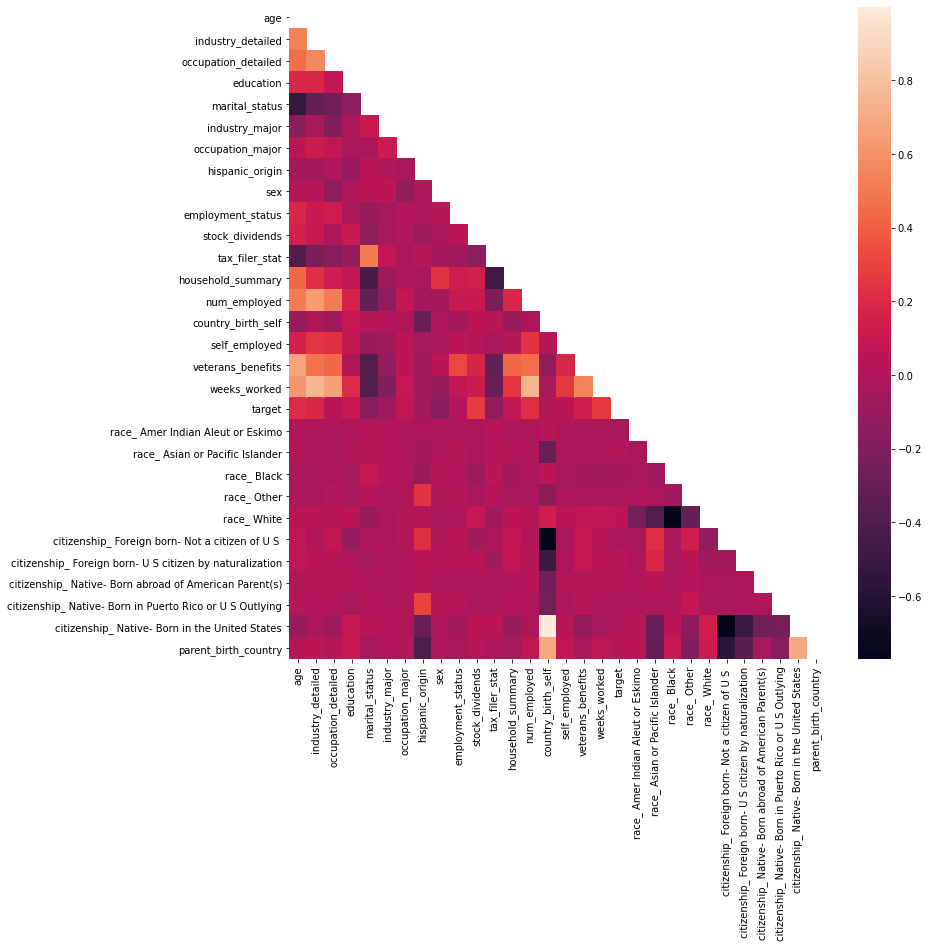

In [50]:
plt.figure(figsize=(12,12))
mask = np.triu(np.ones_like(model_train_df.corr(), dtype=bool))
sns.heatmap(model_train_df.corr(), mask=mask)

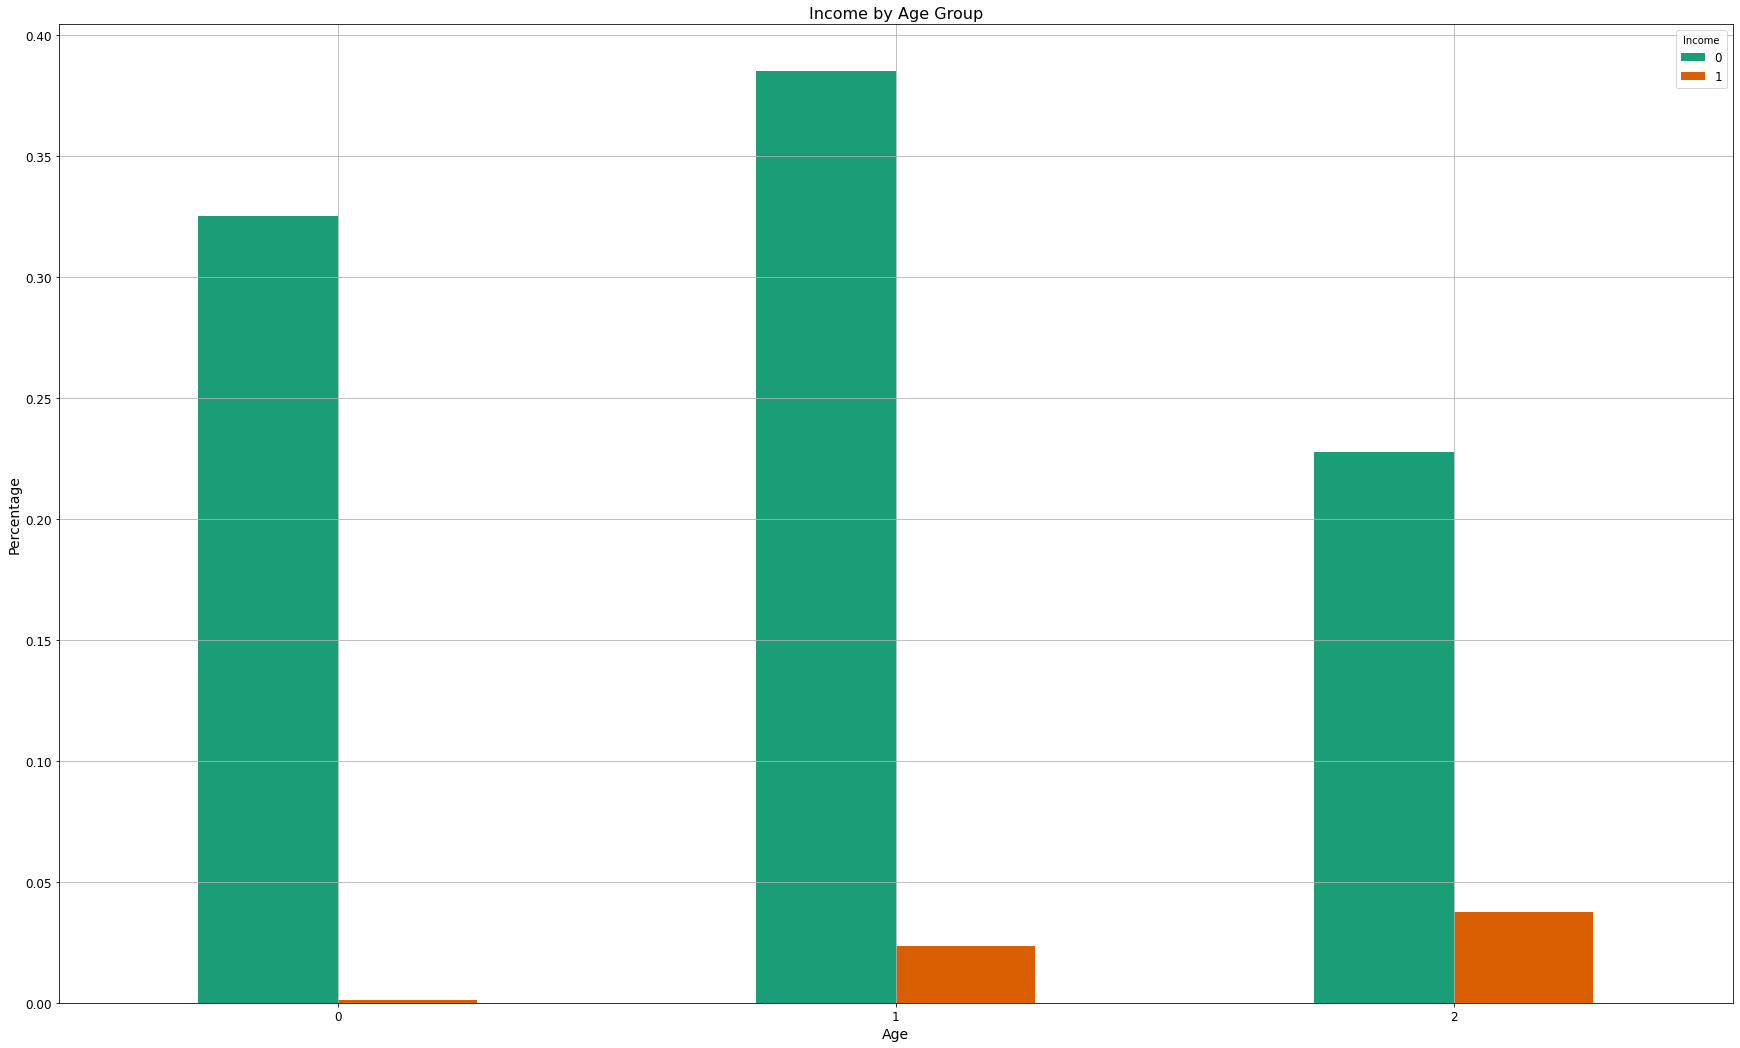

In [51]:
model_age_crosstable=pd.crosstab(model_train_df['age'],model_train_df['target'], normalize=True)

ax = model_age_crosstable.plot(kind='bar', stacked=False, rot=0, figsize=(30 , 18))
ax.legend(title='Income', fontsize=12, )
plt.xlabel('Age', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Income by Age Group', fontsize=16)
plt.grid();

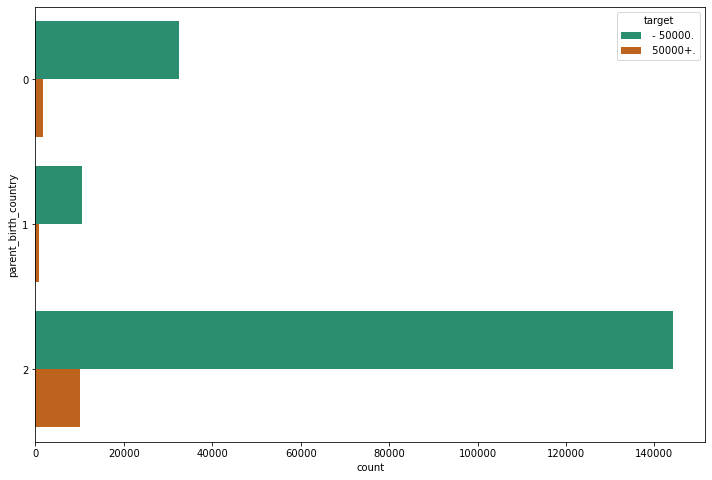

In [52]:
plt.figure(figsize=(12,8))
sns.countplot(y = model_train_df['parent_birth_country'], hue = train_df['target']);

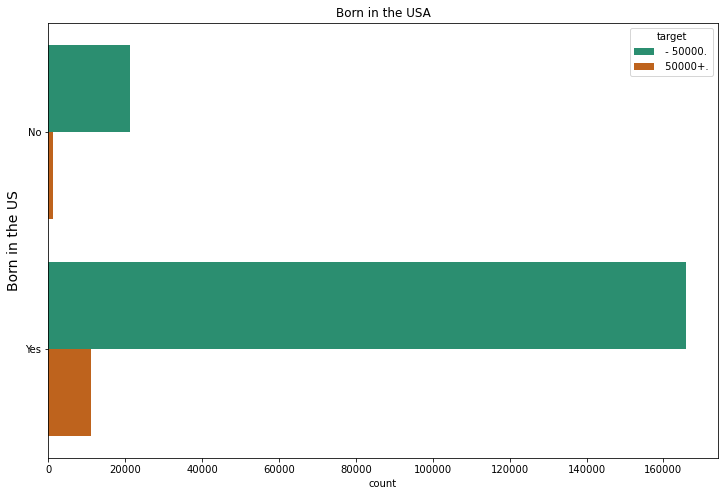

In [53]:
plt.figure(figsize=(12, 8))
sns.countplot(y = train_df['country_birth_self'], hue = train_df['target'])
plt.ylabel('Born in the US', fontsize=14)
plt.yticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.title('Born in the USA');